<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_moons


In [2]:
X,y=make_moons(n_samples=300,noise=0.05,random_state=42)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (300, 2)
y shape: (300,)


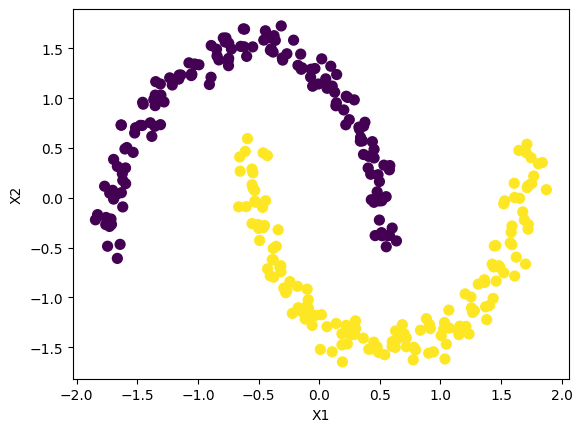

In [5]:
std=StandardScaler()
X_std=std.fit_transform(X)
plt.scatter(x=X_std[:,0],y=X_std[:,1],s=50,c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

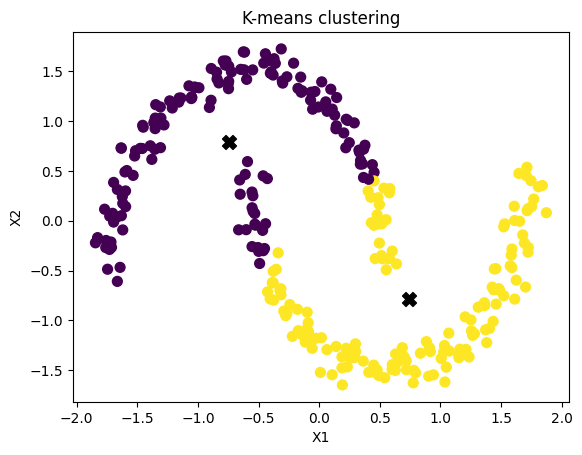

In [11]:
#k-means clustring
kmeans=KMeans(n_clusters=2,random_state=42)
#Compute cluster centers and predict cluster index for each sample
kmeans_labels=kmeans.fit_predict(X_std)
centroids=kmeans.cluster_centers_
#plotting k-means clustering results
plt.scatter(x=X_std[:,0],y=X_std[:,1],s=50,c=kmeans_labels,cmap='viridis')
#show centroids
plt.scatter(x=centroids[:,0],y=centroids[:,1],s=100,c='black',marker='X')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means clustering')
plt.show()


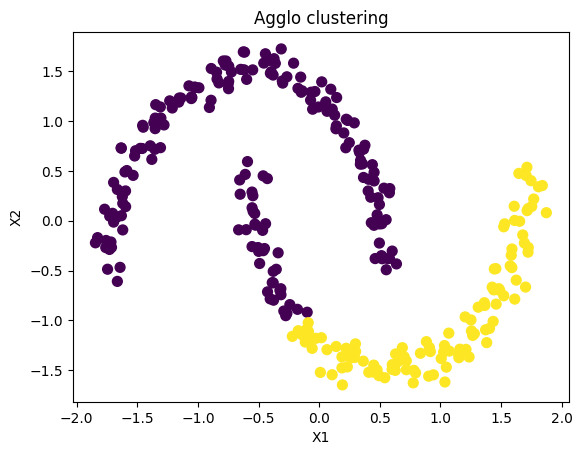

In [17]:
#Agglomerative clustering
agglo=AgglomerativeClustering(n_clusters=2)
agglo_labels=agglo.fit_predict(X_std)
#plotting Agglomeratives clustering results
plt.scatter(x=X_std[:,0],y=X_std[:,1],s=50,c=agglo_labels,cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Agglo clustering')
plt.show()


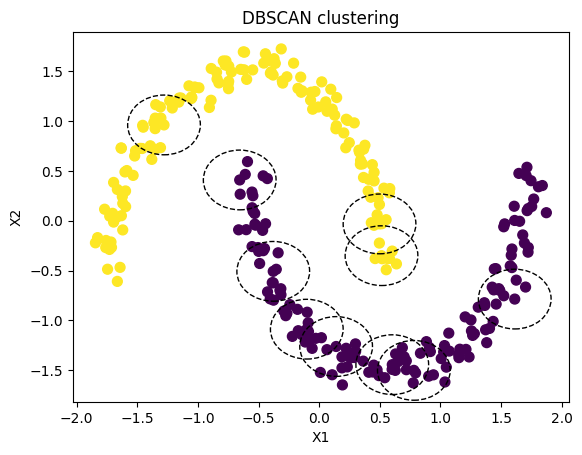

In [18]:
#Dbscan clustering
eps=0.3
dbscan=DBSCAN(eps=eps,min_samples=5)
dbscan_labels=dbscan.fit_predict(X_std)
#plotting Agglomeratives clustering results
plt.scatter(x=X_std[:,0],y=X_std[:,1],s=50,c=dbscan_labels,cmap='viridis')

for i in range(10):
    circle=plt.Circle((X_std[i,0],X_std[i,1]),eps,fill=False,edgecolor='black',linestyle='--')
    plt.gca().add_artist(circle)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('DBSCAN clustering')
plt.show()

In [19]:
#evaluation
from sklearn.metrics import silhouette_score
#For KMeans
kmeans_silhouette=silhouette_score(X_std,kmeans_labels)
print(f'KMeans silhouette score: {kmeans_silhouette}')
#For agglomerative clustering
agglo_silhouette=silhouette_score(X_std,agglo_labels)
print(f'Agglo silhouette score: {agglo_silhouette}')
#For DBSCAN
dbscan_silhouette=silhouette_score(X_std,dbscan_labels)
print(f'DBSCAN silhouette score: {dbscan_silhouette}')

KMeans silhouette score: 0.4954875189931189
Agglo silhouette score: 0.44869301738617196
DBSCAN silhouette score: 0.38602599723729836


In [20]:
from sklearn.metrics import adjusted_rand_score
kmeans_ari=adjusted_rand_score(y,kmeans_labels)
print(f'KMeans ARI: {kmeans_ari}')
agglo_ari=adjusted_rand_score(y,agglo_labels)
print(f'Agglo ARI: {agglo_ari}')
dbscan_ari=adjusted_rand_score(y,dbscan_labels)
print(f'DBSCAN ARI: {dbscan_ari}')

KMeans ARI: 0.47896853094705444
Agglo ARI: 0.5363373393373692
DBSCAN ARI: 1.0


In [22]:
import plotly.graph_objects as go
import numpy as np

fig=go.Figure(data=[go.Scatter3d(x=X_std[:,0],y=X_std[:,1],z=y,mode='markers',marker=dict(size=5,color=dbscan_labels,colorscale='viridis',opacity=0.8))])
fig.add_trace(go.Scatter3d(x=centroids[:,0],y=centroids[:,1],z=y,mode='markers',marker=dict(size=10,color='black',symbol='x')))
fig.update_layout(scene=dict(xaxis_title='X1',yaxis_title='X2',zaxis_title='y'))
fig.show()
